# PHASE 2 PROJECT

## OVERALL DESCRIPTION OF THE DATA

The datasets consist of four main parts:
1. **Gross Dataset**: Focuses on the financial performance of movies in terms of domestic and foreign earnings. This dataset includes key financial columns such as `movie_id`, `domestic_gross`, and `foreign_gross`.
2. **Budget Dataset**: Contains information on the production budgets of movies, including the `movie_id` and `production_budget`. The budget data complements the gross earnings data to analyze the profitability of the movies.
3. **Movie Dataset**: Includes basic information about the movies, such as `id`, `title`, `release_date`, `genre`, `director`, `writer`, and other metadata. This dataset gives insight into the characteristics and classifications of movies.
4. **TMDb Dataset**: Enriches the data with additional information such as genre, box office revenue, and studio data, providing external metadata for the movies.

**Size**: The datasets range from small datasets like budget-related information to larger datasets with detailed movie attributes, typically containing hundreds to thousands of entries.

**Data Types**: The datasets include numeric data (like revenue and budgets), textual data (like movie titles and genres), and datetime values (like release dates and box office dates).

**Missing Values**: Some datasets contain missing values in financial fields, especially in columns like `foreign_gross` and `production_budget`, which are filled by mean or median imputation.

**Purpose**: These datasets collectively allow for a comprehensive analysis of movie performance, including financial data and key metadata. By merging these datasets, one can gain insights into profitability, genre trends, and the overall success factors of movies in various markets.


In [1]:
import pandas as pd

### Gross dataset
**Purpose**: Contains information about the domestic and foreign gross earnings of movies.

**Key Columns**: title, domestic_gross, foreign_gross, studio, year.

**Size**: The dataset contains rows corresponding to individual movies with numeric values for earnings.

**Data Characteristics**:
The domestic_gross and foreign_gross columns hold revenue data.

Missing values in gross columns are handled by filling them with mean values.

In [2]:
gross= pd.read_csv("bom.movie_gross.csv.gz")
gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
#checking  if the gross data set has null values
null_values = gross['foreign_gross'].isnull()
null_values

0       False
1       False
2       False
3       False
4       False
        ...  
3382     True
3383     True
3384     True
3385     True
3386     True
Name: foreign_gross, Length: 3387, dtype: bool

In [5]:
#counting the number of nul values in the foreign_gross column
null_count = gross['foreign_gross'].isnull().sum()
null_count

1350

In [6]:
gross['foreign_gross'] = pd.to_numeric(gross['foreign_gross'], errors='coerce')

In [7]:
print(gross['foreign_gross'].isnull().sum())

1355


In [8]:
# Fill missing values with the mean of 'Foreign Gross'
gross['foreign_gross'] = gross['foreign_gross'].fillna(gross['foreign_gross'].mean())

In [9]:
print(gross['foreign_gross'].dtype)

float64


In [10]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


### Tmdb dataset
**Purpose**: Contains additional movie metadata such as ratings, genres, studios, and budgets sourced from The Movie Database (TMDb).

**Key Columns**: id, title, genre, box_office, production_budget, vote cunt and vote average.

**Size**: Similar to the movie dataset, providing additional context such as genres, budget, and revenue.

**Data Characteristics**:Contains movie metadata like genre and ratings, helping enrich the movie and budget dataset.

Missing or incomplete data is common in movie-related databases.


In [11]:
tmdb = pd.read_csv("tmdb.movies.csv.gz")
tmdb

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [12]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [13]:
# Drop 'Unnamed: 0' and 'genres_id' if 'Unnamed' is represented like 'Unnamed: 0'
tmdb.drop(columns=['Unnamed: 0', 'genre_ids'], inplace=True)

# Display the updated DataFrame
tmdb


,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...
26512,488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [14]:
# Drop the 'original_title' column
tmdb.drop('original_title', axis=1, inplace=True)

# Display the DataFrame after dropping the column
tmdb

,id,original_language,popularity,release_date,title,vote_average,vote_count
0,12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,27205,en,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...
26512,488143,en,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,485975,en,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,381231,en,0.600,2018-10-01,The Last One,0.0,1
26515,366854,en,0.600,2018-06-22,Trailer Made,0.0,1


In [15]:
# Convert 'release_date' to datetime (if it's not already in datetime format)
tmdb['release_date'] = pd.to_datetime(tmdb['release_date'], errors='coerce')

# Extract just the year from 'release_date' and replace the column
tmdb['release_date'] = tmdb['release_date'].dt.year

# Display the updated DataFrame
tmdb


,id,original_language,popularity,release_date,title,vote_average,vote_count
0,12444,en,33.533,2010,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,en,28.734,2010,How to Train Your Dragon,7.7,7610
2,10138,en,28.515,2010,Iron Man 2,6.8,12368
3,862,en,28.005,1995,Toy Story,7.9,10174
4,27205,en,27.920,2010,Inception,8.3,22186
...,...,...,...,...,...,...,...
26512,488143,en,0.600,2018,Laboratory Conditions,0.0,1
26513,485975,en,0.600,2018,_EXHIBIT_84xxx_,0.0,1
26514,381231,en,0.600,2018,The Last One,0.0,1
26515,366854,en,0.600,2018,Trailer Made,0.0,1


In [16]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 26517 non-null  int64  
 1   original_language  26517 non-null  object 
 2   popularity         26517 non-null  float64
 3   release_date       26517 non-null  int64  
 4   title              26517 non-null  object 
 5   vote_average       26517 non-null  float64
 6   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 1.4+ MB


### Movie dataset
**Purpose**: Provides basic information about the movies, such as title, release date, director, and other movie-specific details.

**Key Columns**: id, title, release_date, genre, director, writer, rating, runtime.

**Size**: Larger dataset with diverse movie details.

**Data Characteristics**:
Columns like release_date and dvd_date are used for time-based analysis.

Some columns such as director and writer have been removed.

Some columns, like genre, show high-cardinality, which can be explored for further trends.

In [17]:
movie =  pd.read_table("rt.movie_info.tsv.gz")
movie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [18]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [19]:
# Drop the specified columns from the DataFrame
movie.drop(columns=['synopsis', 'currency', 'box_office', 'studio'], inplace=True)

# Display the updated DataFrame
movie


,id,rating,genre,director,writer,theater_date,dvd_date,runtime
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",104 minutes
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",108 minutes
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",116 minutes
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",128 minutes
4,7,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,200 minutes
...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",106 minutes
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",88 minutes
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",111 minutes
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",101 minutes


In [20]:
# Convert 'theater_date' and 'dvd_date' to datetime format
movie['theater_date'] = pd.to_datetime(movie['theater_date'], errors='coerce')
movie['dvd_date'] = pd.to_datetime(movie['dvd_date'], errors='coerce')

# Extract only the year and create new columns
movie['theater_year'] = movie['theater_date'].dt.year
movie['dvd_year'] = movie['dvd_date'].dt.year

# Display the year columns for theater and DVD dates
print(movie[['theater_year', 'dvd_year']])


      theater_year  dvd_year
0           1971.0    2001.0
1           2012.0    2013.0
2           1996.0    2000.0
3           1994.0    1997.0
4              NaN       NaN
...            ...       ...
1555        2006.0    2007.0
1556        1993.0    2001.0
1557        1962.0    2004.0
1558        1993.0    2002.0
1559        2001.0    2003.0

[1560 rows x 2 columns]


In [21]:
# Check for null values in 'theater_year' and 'dvd_year'
null_values = movie[['theater_year', 'dvd_year']].isnull().sum()

# Print the count of null values
print("Null values in each column:")
print(null_values)

Null values in each column:
theater_year    359
dvd_year        359
dtype: int64


In [22]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   rating        1557 non-null   object        
 2   genre         1552 non-null   object        
 3   director      1361 non-null   object        
 4   writer        1111 non-null   object        
 5   theater_date  1201 non-null   datetime64[ns]
 6   dvd_date      1201 non-null   datetime64[ns]
 7   runtime       1530 non-null   object        
 8   theater_year  1201 non-null   float64       
 9   dvd_year      1201 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 122.0+ KB


In [23]:
# Drop rows where 'theater_year' or 'dvd_year' is null
movie.dropna(subset=['theater_year', 'dvd_year'], inplace=True)

In [24]:
# Check for null values in 'theater_year' and 'dvd_year'
null_values = movie[['theater_year', 'dvd_year']].isnull().sum()

# Print the count of null values
print("Null values in each column:")
print(null_values)

Null values in each column:
theater_year    0
dvd_year        0
dtype: int64


In [25]:
movie

,id,rating,genre,director,writer,theater_date,dvd_date,runtime,theater_year,dvd_year
0,1,R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,2001-09-25,104 minutes,1971.0,2001.0
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,2013-01-01,108 minutes,2012.0,2013.0
2,5,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,2000-04-18,116 minutes,1996.0,2000.0
3,6,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,1997-08-27,128 minutes,1994.0,1997.0
5,8,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,2000-03-03,2000-07-11,95 minutes,2000.0,2000.0
...,...,...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,2006-08-18,2007-01-02,106 minutes,2006.0,2007.0
1556,1997,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,1993-07-23,2001-04-17,88 minutes,1993.0,2001.0
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,1962-01-01,2004-05-11,111 minutes,1962.0,2004.0
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,1993-04-01,2002-01-29,101 minutes,1993.0,2002.0


In [26]:
# Drop the 'writer' and 'director' columns
movie.drop(columns=['writer', 'director'], inplace=True)

# Display the updated dataset
movie

,id,rating,genre,theater_date,dvd_date,runtime,theater_year,dvd_year
0,1,R,Action and Adventure|Classics|Drama,1971-10-09,2001-09-25,104 minutes,1971.0,2001.0
1,3,R,Drama|Science Fiction and Fantasy,2012-08-17,2013-01-01,108 minutes,2012.0,2013.0
2,5,R,Drama|Musical and Performing Arts,1996-09-13,2000-04-18,116 minutes,1996.0,2000.0
3,6,R,Drama|Mystery and Suspense,1994-12-09,1997-08-27,128 minutes,1994.0,1997.0
5,8,PG,Drama|Kids and Family,2000-03-03,2000-07-11,95 minutes,2000.0,2000.0
...,...,...,...,...,...,...,...,...
1555,1996,R,Action and Adventure|Horror|Mystery and Suspense,2006-08-18,2007-01-02,106 minutes,2006.0,2007.0
1556,1997,PG,Comedy|Science Fiction and Fantasy,1993-07-23,2001-04-17,88 minutes,1993.0,2001.0
1557,1998,G,Classics|Comedy|Drama|Musical and Performing Arts,1962-01-01,2004-05-11,111 minutes,1962.0,2004.0
1558,1999,PG,Comedy|Drama|Kids and Family|Sports and Fitness,1993-04-01,2002-01-29,101 minutes,1993.0,2002.0


In [27]:
movie.info( )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1201 non-null   int64         
 1   rating        1201 non-null   object        
 2   genre         1201 non-null   object        
 3   theater_date  1201 non-null   datetime64[ns]
 4   dvd_date      1201 non-null   datetime64[ns]
 5   runtime       1194 non-null   object        
 6   theater_year  1201 non-null   float64       
 7   dvd_year      1201 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 84.4+ KB


### Budget dataset
**Purpose**: Includes information about the production budgets of movies.

**Key Columns**: release date, movie, domestic gross, worldwide gross, production_budget.

**Size**: Similar in size to the gross dataset, with each row representing a movie and its respective budget.

**Data Characteristics:**
The production_budget, worldwide gross and domestic gross column are numeric and used for financial analysis.


In [28]:
budget = pd.read_csv("tn.movie_budgets.csv.gz")
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [29]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [30]:
#removing the dollar sign
budget['production_budget'] = budget['production_budget'].replace({'\$': '', ',': ''}, regex=True)

In [31]:
# Convert 'Production Budget' to a numeric type (float), any invalid entries become NaN
budget['production_budget'] = pd.to_numeric(budget['production_budget'], errors='coerce')

# Check the data type of 'Production Budget' to ensure it's a float
print(budget['production_budget'].dtype)

int64


In [32]:
budget['domestic_gross'] = budget['domestic_gross'].replace({'\$': '', ',': ''}, regex=True)

In [33]:
# Convert 'Production Budget' to a numeric type (float), any invalid entries become NaN
budget['domestic_gross'] = pd.to_numeric(budget['domestic_gross'], errors='coerce')

# Check the data type of 'Production Budget' to ensure it's a float
print(budget['domestic_gross'].dtype)

int64


In [34]:
budget['worldwide_gross'] = budget['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True)

In [35]:
# Convert 'Production Budget' to a numeric type (float), any invalid entries become NaN
budget['worldwide_gross'] = pd.to_numeric(budget['worldwide_gross'], errors='coerce')

# Check the data type of 'Production Budget' to ensure it's a float
print(budget['worldwide_gross'].dtype)

int64


In [36]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


### IM DATABASE

In [37]:
import sqlite3

In [38]:
# connecting to the database
conn = sqlite3.connect("im.db.zip")
cursor = conn.cursor()

In [39]:
import zipfile
import sqlite3
import os

# Path to the zip file
zip_file_path = 'im.db.zip'

# Folder to extract the database
extracted_folder = 'extracted_files/'

# Create the folder if it doesn't exist
os.makedirs(extracted_folder, exist_ok=True)

# Extract the database file from the zip archive
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all files to the folder
    zip_ref.extractall(extracted_folder)

# Print extracted files to check what's inside
extracted_files = os.listdir(extracted_folder)
print(f"Extracted files: {extracted_files}")

# Assuming the database file is inside the extracted folder and is named 'im.db'
db_file_path = os.path.join(extracted_folder, 'im.db')

# Check if the database file exists
if os.path.exists(db_file_path):
    try:
        # Connect to the extracted database file
        conn = sqlite3.connect(db_file_path)
        cursor = conn.cursor()
        
        # Example query to check tables
        cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
        tables = cursor.fetchall()
        print("Tables in the database:", tables)
        
        # Close the connection
        conn.close()
    except sqlite3.DatabaseError as e:
        print(f"Database error: {e}")
else:
    print(f"Database file {db_file_path} not found after extraction.")

Extracted files: ['im.db']
Tables in the database: [('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]


In [40]:
import zipfile
import sqlite3
import os

# Path to the zip file
zip_file = 'im.db.zip'
extracted_folder = 'extracted_files/'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Connect to the extracted database file (adjust filename if needed)
db_file_path = os.path.join(extracted_folder, 'im.db')
conn = sqlite3.connect(db_file_path)

# Now you can use cursor to query
cursor = conn.cursor()

In [41]:
# Example query to fetch table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the tables in the database
for table in tables:
    print(table[0])  # Since it returns tuples, print the first item (table name)

movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


In [42]:
import pandas as pd

# Query to fetch all data from the 'movie_basic' table
cursor.execute("SELECT * FROM movie_ratings")

# Fetch all rows from the result and convert to a pandas DataFrame
df = pd.DataFrame(cursor.fetchall(), columns=[description[0] for description in cursor.description])

# Display the table
df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## JOINING AND  MERGING

### FINANCE datasets
To merge the **gross** and **budget** datasets, we used different columns as the key for each dataset. In the **gross dataset**, we joined based on the `title` column, while in the **budget dataset**, we used the `movie_id` column to align the two datasets.

1. **Join Basis**: The join is done on `title` from the **gross dataset** and `movie_id` from the **budget dataset**.
2. **Join Type**: An **inner join** was used to ensure that only the movies present in both datasets are included.
3. **Outcome**: The merged dataset combines financial details such as `domestic_gross`, `foreign_gross`, and `production_budget`, allowing for profitability and financial performance analysis.


In [43]:
finance =  pd.merge(gross, budget, left_on='title', right_on='movie')

In [44]:
finance

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010,47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522
1,Inception,WB,292600000.0,5.357000e+08,2010,38,"Jul 16, 2010",Inception,160000000,292576195,835524642
2,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010,27,"May 21, 2010",Shrek Forever After,165000000,238736787,756244673
3,The Twilight Saga: Eclipse,Sum.,300500000.0,3.980000e+08,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,300531751,706102828
4,Iron Man 2,Par.,312400000.0,3.115000e+08,2010,15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,7.505704e+07,2018,64,"Jun 15, 2018",Gotti,10000000,4286367,6089100
1243,Ben is Back,RAtt.,3700000.0,7.505704e+07,2018,95,"Dec 7, 2018",Ben is Back,13000000,3703182,9633111
1244,Bilal: A New Breed of Hero,VE,491000.0,1.700000e+06,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000,490973,648599
1245,Mandy,RLJ,1200000.0,7.505704e+07,2018,71,"Sep 14, 2018",Mandy,6000000,1214525,1427656


In [45]:
#dropping the domestic gross duplicate column
finance.drop(columns='domestic_gross_y', inplace=True)

In [46]:
# Dropping the'Release_Date' 
finance.drop(columns=['release_date'], inplace=True)

# Display the updated DataFrame
finance


,title,studio,domestic_gross_x,foreign_gross,year,id,movie,production_budget,worldwide_gross
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010,47,Toy Story 3,200000000,1068879522
1,Inception,WB,292600000.0,5.357000e+08,2010,38,Inception,160000000,835524642
2,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010,27,Shrek Forever After,165000000,756244673
3,The Twilight Saga: Eclipse,Sum.,300500000.0,3.980000e+08,2010,53,The Twilight Saga: Eclipse,68000000,706102828
4,Iron Man 2,Par.,312400000.0,3.115000e+08,2010,15,Iron Man 2,170000000,621156389
...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,7.505704e+07,2018,64,Gotti,10000000,6089100
1243,Ben is Back,RAtt.,3700000.0,7.505704e+07,2018,95,Ben is Back,13000000,9633111
1244,Bilal: A New Breed of Hero,VE,491000.0,1.700000e+06,2018,100,Bilal: A New Breed of Hero,30000000,648599
1245,Mandy,RLJ,1200000.0,7.505704e+07,2018,71,Mandy,6000000,1427656


In [47]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247 entries, 0 to 1246
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   domestic_gross_x   1245 non-null   float64
 3   foreign_gross      1247 non-null   float64
 4   year               1247 non-null   int64  
 5   id                 1247 non-null   int64  
 6   movie              1247 non-null   object 
 7   production_budget  1247 non-null   int64  
 8   worldwide_gross    1247 non-null   int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 97.4+ KB


In [48]:
# Reset the index and drop the current index (if needed)
finance.reset_index(drop=True, inplace=True)

# Create a new 'ID' column starting from 1
finance['ID'] = finance.index + 1

# Display the DataFrame to see the changes
finance


,title,studio,domestic_gross_x,foreign_gross,year,id,movie,production_budget,worldwide_gross,ID
0,Toy Story 3,BV,415000000.0,6.520000e+08,2010,47,Toy Story 3,200000000,1068879522,1
1,Inception,WB,292600000.0,5.357000e+08,2010,38,Inception,160000000,835524642,2
2,Shrek Forever After,P/DW,238700000.0,5.139000e+08,2010,27,Shrek Forever After,165000000,756244673,3
3,The Twilight Saga: Eclipse,Sum.,300500000.0,3.980000e+08,2010,53,The Twilight Saga: Eclipse,68000000,706102828,4
4,Iron Man 2,Par.,312400000.0,3.115000e+08,2010,15,Iron Man 2,170000000,621156389,5
...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,7.505704e+07,2018,64,Gotti,10000000,6089100,1243
1243,Ben is Back,RAtt.,3700000.0,7.505704e+07,2018,95,Ben is Back,13000000,9633111,1244
1244,Bilal: A New Breed of Hero,VE,491000.0,1.700000e+06,2018,100,Bilal: A New Breed of Hero,30000000,648599,1245
1245,Mandy,RLJ,1200000.0,7.505704e+07,2018,71,Mandy,6000000,1427656,1246


In [49]:
finance.drop('movie', axis=1, inplace=True)

In [50]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   domestic_gross_x   1245 non-null   float64
 3   foreign_gross      1247 non-null   float64
 4   year               1247 non-null   int64  
 5   id                 1247 non-null   int64  
 6   production_budget  1247 non-null   int64  
 7   worldwide_gross    1247 non-null   int64  
 8   ID                 1247 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 87.8+ KB


In [51]:
#saving a copy of the finance dataset
finance.to_csv('finance_dataset.csv', index=False)

### REVIEW DATASET
The **review dataset** was created by merging two datasets: **movies** and **TMDB**. These datasets were joined using an **inner join** on the common **`id`** column. The inner join ensures that only the rows with matching `id` values in both datasets are included, resulting in a dataset that contains detailed information on movies and their corresponding attributes from both the **movies** and **TMDB** datasets.

- **Merged Datasets**: The **movies** and **TMDB** datasets were merged using the `pd.merge()` function with the **`on='id'`** parameter, and the **how='inner'** argument to retain only matching rows.
- **Inner Join**: Only movies that existed in both datasets were kept, filtering out rows with missing matching entries in either dataset.

The resulting **review dataset** contains information about movie attributes like **title**, **studio**, **genres**, **budget**, **gross revenue**, **vote count**, **popularity**, and more.

In [52]:
# Merge the two datasets using the 'id' column
review = pd.merge(movie, tmdb, on='id', how= 'inner')

# Display the merged dataset
review

,id,rating,genre,theater_date,dvd_date,runtime,theater_year,dvd_year,original_language,popularity,release_date,title,vote_average,vote_count
0,93,R,Classics|Comedy|Drama|Romance,1939-11-03,2005-09-05,110 minutes,1939.0,2005.0,en,12.710,1959,Anatomy of a Murder,7.9,359
1,95,R,Drama|Sports and Fitness,2016-11-18,2017-02-14,116 minutes,2016.0,2017.0,en,15.799,1998,Armageddon,6.7,4267
2,189,NR,Drama|Horror|Mystery and Suspense|Television,1996-09-29,2003-02-04,94 minutes,1996.0,2003.0,en,20.896,2014,Sin City: A Dame to Kill For,6.3,2210
3,221,PG,Classics|Drama,1957-06-01,2011-12-13,147 minutes,1957.0,2011.0,en,9.752,2018,Rebel Without a Cause,7.7,740
4,311,PG-13,Art House and International|Drama,1993-01-01,2008-04-01,120 minutes,1993.0,2008.0,en,17.717,1984,Once Upon a Time in America,8.4,2243
5,387,NR,Action and Adventure|Classics|Western|Romance,1968-04-10,2002-06-04,109 minutes,1968.0,2002.0,de,16.554,1982,Das Boot,8.1,981
6,387,NR,Action and Adventure|Classics|Western|Romance,1968-04-10,2002-06-04,109 minutes,1968.0,2002.0,de,16.554,1982,Das Boot,8.1,981
7,489,R,Comedy,1990-04-11,2004-07-06,91 minutes,1990.0,2004.0,en,18.013,1997,Good Will Hunting,8.1,5764
8,614,PG,Classics|Drama|Western,1972-01-13,1998-10-06,128 minutes,1972.0,1998.0,sv,9.381,1957,Wild Strawberries,8.1,595
9,755,PG-13,Action and Adventure|Science Fiction and Fantasy,2003-11-26,2004-04-13,116 minutes,2003.0,2004.0,en,16.064,1996,From Dusk Till Dawn,7.0,3015


In [53]:
# Get the number of rows and columns in the dataset
rows, columns = review.shape

# Display the result
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 24 rows and 14 columns.


In [54]:
# Drop the 'theater_date' and 'dvd_date' columns
review.drop(columns=['theater_date', 'dvd_date'], inplace=True)

# Display the updated dataset
review

,id,rating,genre,runtime,theater_year,dvd_year,original_language,popularity,release_date,title,vote_average,vote_count
0,93,R,Classics|Comedy|Drama|Romance,110 minutes,1939.0,2005.0,en,12.710,1959,Anatomy of a Murder,7.9,359
1,95,R,Drama|Sports and Fitness,116 minutes,2016.0,2017.0,en,15.799,1998,Armageddon,6.7,4267
2,189,NR,Drama|Horror|Mystery and Suspense|Television,94 minutes,1996.0,2003.0,en,20.896,2014,Sin City: A Dame to Kill For,6.3,2210
3,221,PG,Classics|Drama,147 minutes,1957.0,2011.0,en,9.752,2018,Rebel Without a Cause,7.7,740
4,311,PG-13,Art House and International|Drama,120 minutes,1993.0,2008.0,en,17.717,1984,Once Upon a Time in America,8.4,2243
5,387,NR,Action and Adventure|Classics|Western|Romance,109 minutes,1968.0,2002.0,de,16.554,1982,Das Boot,8.1,981
6,387,NR,Action and Adventure|Classics|Western|Romance,109 minutes,1968.0,2002.0,de,16.554,1982,Das Boot,8.1,981
7,489,R,Comedy,91 minutes,1990.0,2004.0,en,18.013,1997,Good Will Hunting,8.1,5764
8,614,PG,Classics|Drama|Western,128 minutes,1972.0,1998.0,sv,9.381,1957,Wild Strawberries,8.1,595
9,755,PG-13,Action and Adventure|Science Fiction and Fantasy,116 minutes,2003.0,2004.0,en,16.064,1996,From Dusk Till Dawn,7.0,3015


In [55]:
import numpy as np

In [56]:
# Calculate percentiles
quantiles = review['popularity'].quantile([0.25, 0.50, 0.75])

# Define the bins using these percentiles
bins = [0, quantiles[0.25], quantiles[0.50], quantiles[0.75], np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']

# Apply binning
review['popularity_group_percentiles'] = pd.cut(review['popularity'], bins=bins, labels=labels, right=False)

# Check the result
print(review[['popularity', 'popularity_group_percentiles']].head())


   popularity popularity_group_percentiles
0      12.710                       Medium
1      15.799                       Medium
2      20.896                         High
3       9.752                          Low
4      17.717                         High


In [57]:
review['popularity_group_percentiles']

0        Medium
1        Medium
2          High
3           Low
4          High
5          High
6          High
7          High
8           Low
9        Medium
10       Medium
11          Low
12          Low
13       Medium
14    Very High
15    Very High
16    Very High
17    Very High
18          Low
19          Low
20    Very High
21         High
22    Very High
23    Very High
Name: popularity_group_percentiles, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']

In [58]:
# Use conditional logic to create groups based on custom thresholds
conditions = [
    (review['vote_average'] <= 4),  # Rating of 4 or lower
    (review['vote_average'] > 4) & (review['vote_average'] <= 6),  # Rating between 4 and 6
    (review['vote_average'] > 6) & (review['vote_average'] <= 8),  # Rating between 6 and 8
    (review['vote_average'] > 8)  # Rating greater than 8
]

# Define the corresponding categories reflecting "Good", "Better"
choices = ['Bad', 'Good', 'Better', 'Best']

# Create a new column based on the conditions
review['vote_average_group_conditions'] = np.select(conditions, choices, default='Unknown')

# Check the result
print(review[['vote_average', 'vote_average_group_conditions']].head())


   vote_average vote_average_group_conditions
0           7.9                        Better
1           6.7                        Better
2           6.3                        Better
3           7.7                        Better
4           8.4                          Best


In [59]:
review['vote_average_group_conditions']

0     Better
1     Better
2     Better
3     Better
4       Best
5       Best
6       Best
7       Best
8       Best
9     Better
10      Best
11    Better
12    Better
13    Better
14    Better
15    Better
16    Better
17    Better
18    Better
19    Better
20    Better
21    Better
22    Better
23    Better
Name: vote_average_group_conditions, dtype: object

In [60]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   id                             24 non-null     int64   
 1   rating                         24 non-null     object  
 2   genre                          24 non-null     object  
 3   runtime                        24 non-null     object  
 4   theater_year                   24 non-null     float64 
 5   dvd_year                       24 non-null     float64 
 6   original_language              24 non-null     object  
 7   popularity                     24 non-null     float64 
 8   release_date                   24 non-null     int64   
 9   title                          24 non-null     object  
 10  vote_average                   24 non-null     float64 
 11  vote_count                     24 non-null     int64   
 12  popularity_group_percentiles   24 non-

In [61]:
#saving a copy of the review dataset 
review.to_csv('review_dataset.csv', index=False)

## EXPLOTARY DATA ANALYSIS

### Univariate analysis

In [62]:
#checking how many movies were produced over the years
finance['year'].value_counts().sort_index()

2010    184
2011    168
2012    144
2013    140
2014    128
2015    146
2016    141
2017    103
2018     93
Name: year, dtype: int64

<AxesSubplot:ylabel='Frequency'>

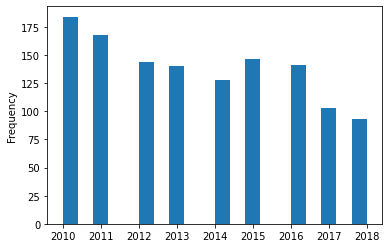

In [63]:
#histogram distribution of movies produced over the years
finance['year'].plot(kind='hist', bins=20)

In [64]:
#checking the studio that produced many movies
finance['studio'].value_counts().head(20)

Uni.       117
Fox        110
WB         102
Sony        74
Par.        74
BV          72
LGF         61
FoxS        47
Wein.       41
Focus       39
WB (NL)     37
SPC         33
LG/S        31
IFC         30
Rela.       28
ORF         27
RAtt.       25
SGem        25
A24         21
Magn.       20
Name: studio, dtype: int64

<AxesSubplot:>

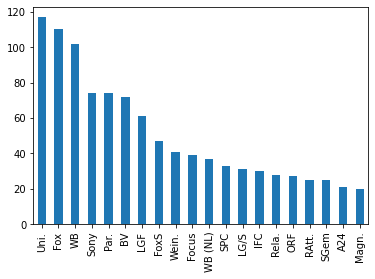

In [65]:
#the distribution of studios over the years
finance['studio'].value_counts().head(20).plot(kind='bar')

In [66]:
#checking the most popular genres 
review['genre'].value_counts()

Comedy                                                                                  3
Drama                                                                                   3
Action and Adventure|Classics|Western|Romance                                           2
Action and Adventure|Art House and International|Comedy|Cult Movies|Drama               2
Action and Adventure|Art House and International|Classics|Drama|Mystery and Suspense    1
Classics|Drama                                                                          1
Comedy|Drama|Romance                                                                    1
Classics|Comedy|Drama|Romance                                                           1
Classics|Drama|Western                                                                  1
Classics|Drama|Mystery and Suspense                                                     1
Drama|Sports and Fitness                                                                1
Action and

In [67]:
#splitting then checking  the  most popular genres
movie['genre'].str.split(',').explode().value_counts()

Drama                                                    103
Comedy                                                    89
Comedy|Drama                                              63
Drama|Mystery and Suspense                                50
Art House and International|Drama                         43
                                                        ... 
Comedy|Kids and Family|Romance                             1
Comedy|Horror|Musical and Performing Arts                  1
Animation|Art House and International|Kids and Family      1
Action and Adventure|Comedy|Horror|Romance                 1
Comedy|Western                                             1
Name: genre, Length: 270, dtype: int64

In [68]:
rating_counts = review['rating'].value_counts()
print(rating_counts)

R        9
PG       5
NR       5
PG-13    4
G        1
Name: rating, dtype: int64


<AxesSubplot:ylabel='rating'>

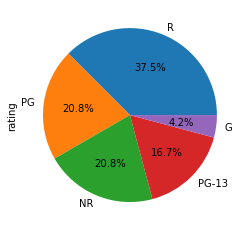

In [69]:
#pie chart ilustrating the distribution of genre ratings
rating_counts.plot(kind='pie', autopct='%1.1f%%')

In [70]:
#checking the theatre year count
theater_year_counts = review['theater_year'].value_counts().sort_index()
print(theater_year_counts)

1932.0    1
1939.0    1
1955.0    1
1957.0    1
1966.0    1
1968.0    2
1969.0    1
1970.0    1
1972.0    1
1988.0    1
1990.0    2
1993.0    2
1996.0    1
2003.0    1
2004.0    1
2006.0    2
2007.0    1
2013.0    2
2016.0    1
Name: theater_year, dtype: int64


<AxesSubplot:>

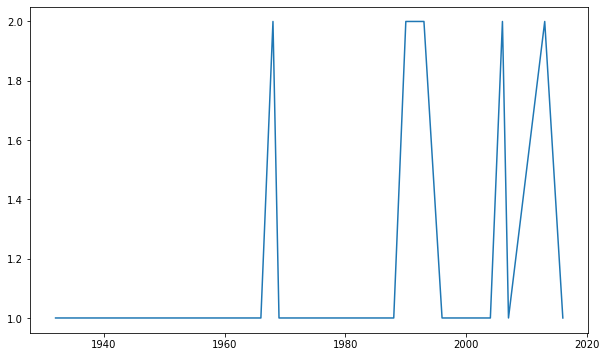

In [71]:
#checking the distribution of movie in theatre  over the years
theater_year_counts.plot(kind='line', figsize=(10,6))

In [72]:
dvd_year_counts = review['dvd_year'].value_counts().sort_index()
print(dvd_year_counts)

1991.0    2
1992.0    1
1998.0    1
2000.0    1
2001.0    2
2002.0    2
2003.0    1
2004.0    3
2005.0    3
2006.0    2
2007.0    1
2008.0    1
2011.0    1
2013.0    2
2017.0    1
Name: dvd_year, dtype: int64


<AxesSubplot:>

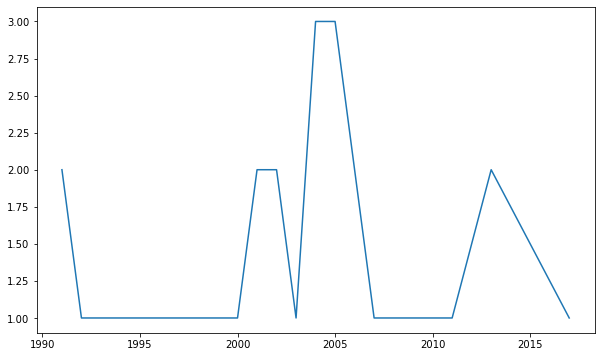

In [73]:
#lineplot showing the  trend of dvd movies over the years
dvd_year_counts.plot(kind='line', figsize=(10,6))

In [74]:
language_counts = review['original_language'].value_counts()
print(language_counts)

en    20
de     2
sv     2
Name: original_language, dtype: int64


<AxesSubplot:ylabel='original_language'>

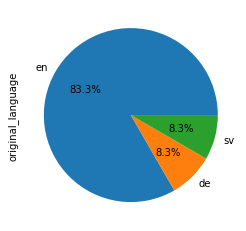

In [75]:
#pie chart ilustrating the distribution of language 
language_counts.plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:>

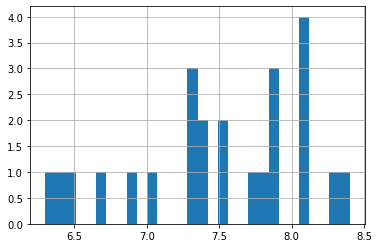

In [76]:
#average distribution of the histogram 
review['vote_average'].hist(bins=30)

<AxesSubplot:>

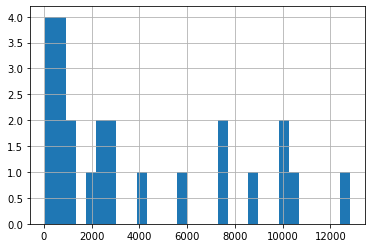

In [77]:
#vote count distribution
review['vote_count'].hist(bins=30)

In [78]:
import matplotlib.pyplot as plt

# Count the number of occurrences in each group
popularity_group_counts = review['popularity_group_percentiles'].value_counts()
popularity_group_counts

Very High    7
High         6
Low          6
Medium       5
Name: popularity_group_percentiles, dtype: int64

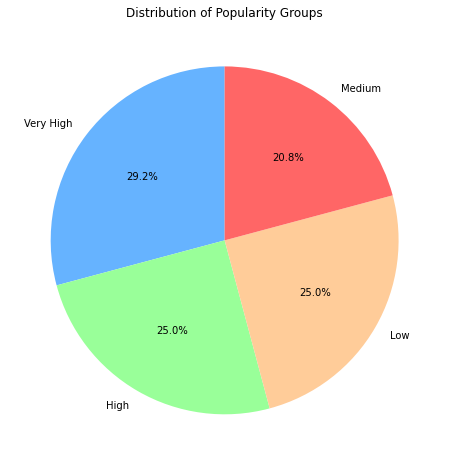

In [79]:
# Plot the pie chart
plt.figure(figsize=(8, 8))
popularity_group_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff6666'])
plt.title('Distribution of Popularity Groups')
plt.ylabel('')  # Remove the y-axis label for a cleaner chart
plt.show()

### Bivariate  analysis

In [80]:
import seaborn as sns

In [81]:
finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   domestic_gross_x   1245 non-null   float64
 3   foreign_gross      1247 non-null   float64
 4   year               1247 non-null   int64  
 5   id                 1247 non-null   int64  
 6   production_budget  1247 non-null   int64  
 7   worldwide_gross    1247 non-null   int64  
 8   ID                 1247 non-null   int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 87.8+ KB


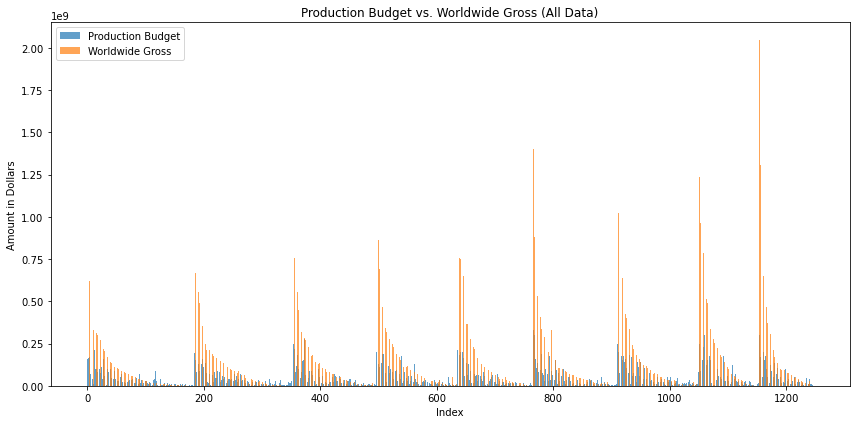

In [82]:
plt.figure(figsize=(12, 6))

# Bar chart for comparing production_budget and worldwide_gross
plt.bar(range(len(finance)), finance['production_budget'], label='Production Budget', alpha=0.7)
plt.bar(range(len(finance)), finance['worldwide_gross'], label='Worldwide Gross', alpha=0.7, width=0.4)

plt.title('Production Budget vs. Worldwide Gross (All Data)')
plt.xlabel('Index')
plt.ylabel('Amount in Dollars')
plt.legend()
plt.tight_layout()
plt.show()

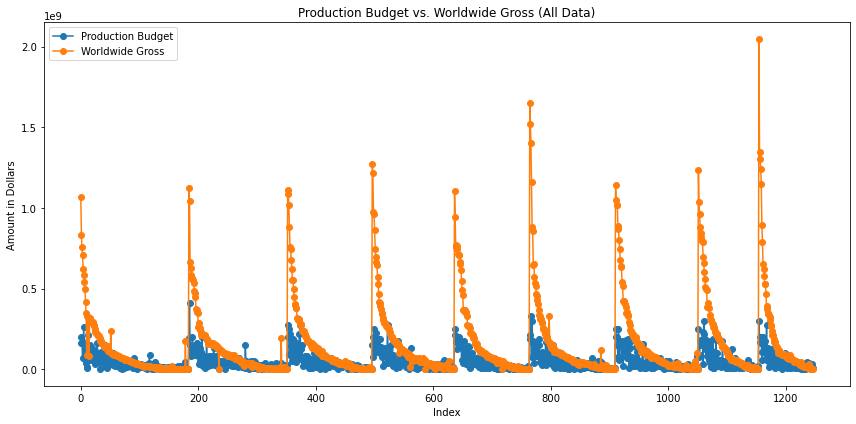

In [83]:
plt.figure(figsize=(12, 6))

# Line graph for comparing production_budget and worldwide_gross
plt.plot(finance['production_budget'], label='Production Budget', marker='o')
plt.plot(finance['worldwide_gross'], label='Worldwide Gross', marker='o')

plt.title('Production Budget vs. Worldwide Gross (All Data)')
plt.xlabel('Index')
plt.ylabel('Amount in Dollars')
plt.legend()
plt.tight_layout()
plt.show()


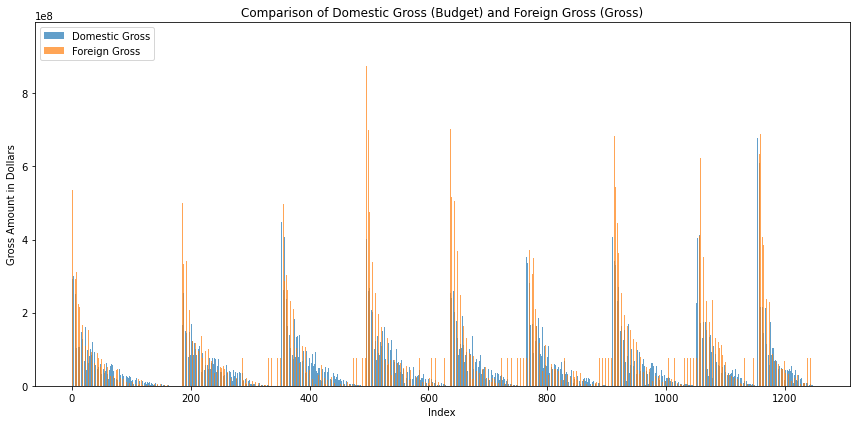

In [84]:
plt.figure(figsize=(12, 6))  

# Bar graph comparing Domestic_Gross and Foreign_Gross  
indices = range(len(finance))  # Generate indices based on the data length  
plt.bar(indices, finance['domestic_gross_x'], label='Domestic Gross', alpha=0.7)  
plt.bar(indices, finance['foreign_gross'], label='Foreign Gross', alpha=0.7, width=0.4)  

plt.title('Comparison of Domestic Gross (Budget) and Foreign Gross (Gross)')  
plt.xlabel('Index')  
plt.ylabel('Gross Amount in Dollars')  
plt.legend()  
plt.tight_layout()  
plt.show()  


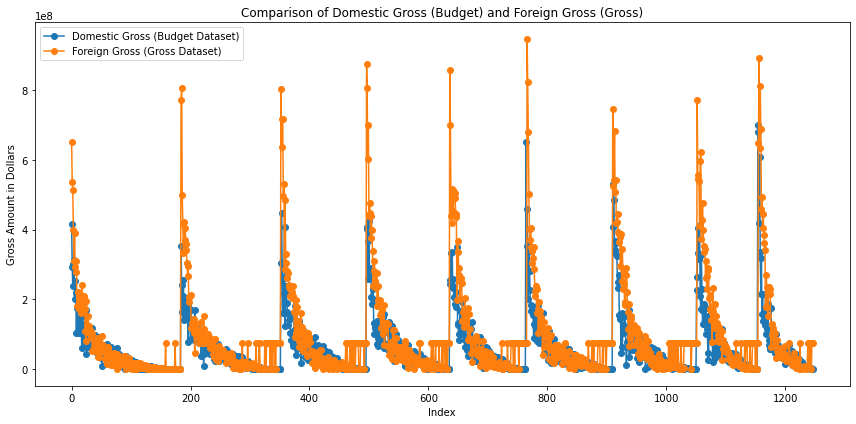

In [85]:
plt.figure(figsize=(12, 6))  

# Line graph comparing Domestic_Gross and Foreign_Gross  
plt.plot(finance['domestic_gross_x'], label='Domestic Gross (Budget Dataset)', marker='o')  
plt.plot(finance['foreign_gross'], label='Foreign Gross (Gross Dataset)', marker='o')  

plt.title('Comparison of Domestic Gross (Budget) and Foreign Gross (Gross)')  
plt.xlabel('Index')  
plt.ylabel('Gross Amount in Dollars')  
plt.legend()  
plt.tight_layout()  
plt.show()  


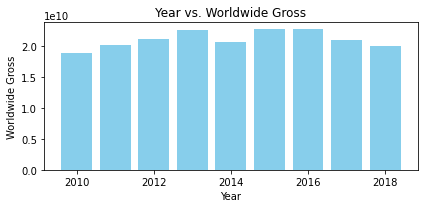

In [86]:
plt.figure(figsize=(6, 3))

# Group data by year and sum the worldwide_gross
yearly_gross = finance.groupby('year')['worldwide_gross'].sum().reset_index()

# Bar chart
plt.bar(yearly_gross['year'], yearly_gross['worldwide_gross'], color='skyblue')

plt.title('Year vs. Worldwide Gross')
plt.xlabel('Year')
plt.ylabel('Worldwide Gross')
plt.tight_layout()
plt.show()


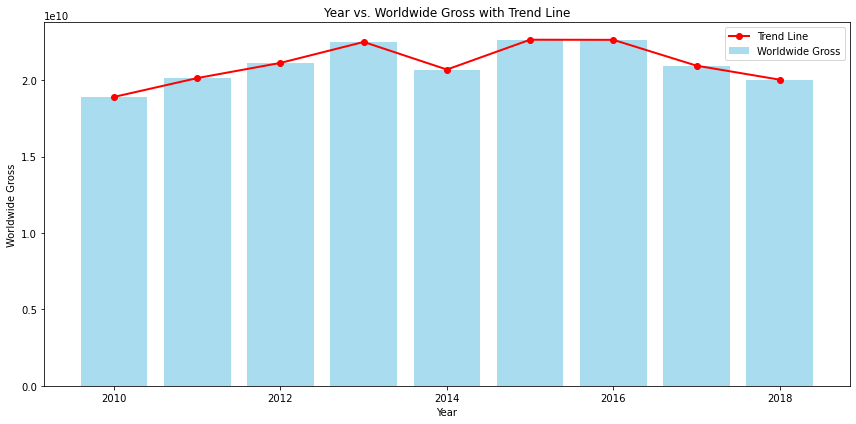

In [87]:
plt.figure(figsize=(12, 6))

# Group data by year and sum the worldwide_gross
yearly_gross = finance.groupby('year')['worldwide_gross'].sum().reset_index()

# Bar chart
plt.bar(yearly_gross['year'], yearly_gross['worldwide_gross'], color='skyblue', alpha=0.7, label='Worldwide Gross')

# Line graph showing the trend
plt.plot(yearly_gross['year'], yearly_gross['worldwide_gross'], color='red', marker='o', label='Trend Line', linewidth=2)

# Adding labels and title
plt.title('Year vs. Worldwide Gross with Trend Line')
plt.xlabel('Year')
plt.ylabel('Worldwide Gross')
plt.legend()
plt.tight_layout()
plt.show()


In [88]:
#checking the return on investments
# Adding an ROI column
finance['ROI'] = (finance['worldwide_gross'] - finance['production_budget']) / finance['production_budget']

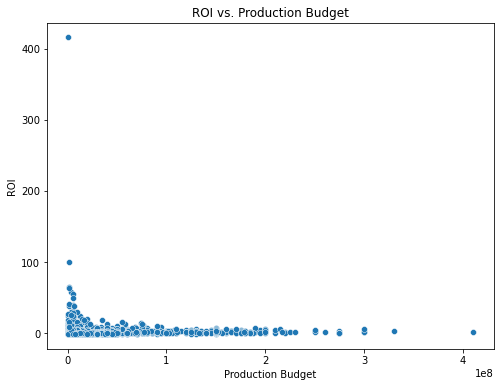

In [89]:
# Scatter plot for ROI vs. Production Budget
plt.figure(figsize=(8, 6))
sns.scatterplot(x='production_budget', y='ROI', data=finance)
plt.title('ROI vs. Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('ROI')
plt.show()


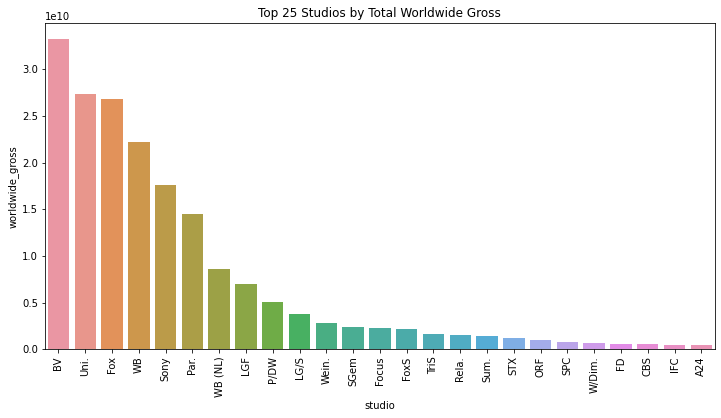

In [93]:
#checking studio vs the worldwide gross
# Calculate the total worldwide gross by studio
studio_gross = finance.groupby('studio')['worldwide_gross'].sum().reset_index()

# Sort by worldwide gross for better visual ranking
studio_gross = studio_gross.sort_values(by='worldwide_gross', ascending=False)

# Get the top 25 studios by worldwide gross
top_25_studios = studio_gross.head(25)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='studio', y='worldwide_gross', data=top_25_studios)
plt.xticks(rotation=90)  # Rotate the studio names for better visibility
plt.title('Top 25 Studios by Total Worldwide Gross')
plt.show()


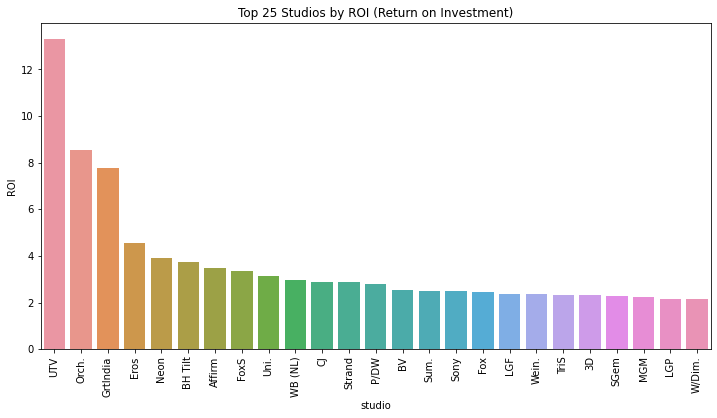

In [94]:
#checking the top studios in  return of investment 
# Calculate the total worldwide gross and production budget by studio
studio_finances = finance.groupby('studio')[['worldwide_gross', 'production_budget']].sum().reset_index()

# Calculate ROI for each studio
studio_finances['ROI'] = (studio_finances['worldwide_gross'] - studio_finances['production_budget']) / studio_finances['production_budget']

# Sort by ROI for better visual ranking
studio_finances = studio_finances.sort_values(by='ROI', ascending=False)

# Get the top 25 studios by ROI
top_25_roi_studios = studio_finances.head(25)

# Create the bar plot for ROI
plt.figure(figsize=(12, 6))
sns.barplot(x='studio', y='ROI', data=top_25_roi_studios)
plt.xticks(rotation=90)  # Rotate the studio names for better visibility
plt.title('Top 25 Studios by ROI (Return on Investment)')
plt.ylabel('ROI')
plt.show()


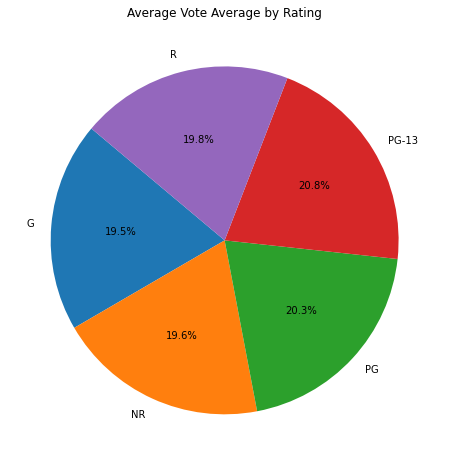

In [100]:
#pie chart ilustrating the average voting by groups
rating_avg_vote = review.groupby('rating')['vote_average'].mean().reset_index()

rating_avg_vote['vote_average'] = rating_avg_vote['vote_average'].round(2)

# Plot the pie chart (using vote averages)
plt.figure(figsize=(10, 8))
plt.pie(rating_avg_vote['vote_average'], labels=rating_avg_vote['rating'], autopct='%1.1f%%', startangle=140)
plt.title('Average Vote Average by Rating')

plt.show()


### Multivariate analysis

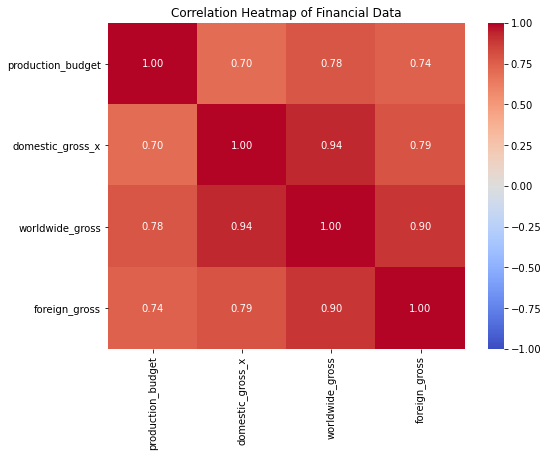

In [104]:
# Select continuous numerical columns for correlation
finance_data = finance[['production_budget', 'domestic_gross_x', 'worldwide_gross', 'foreign_gross']]

# Compute the correlation matrix
corr_matrix = finance_data.corr()

# Plot a heatmap of the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Financial Data')
plt.show()


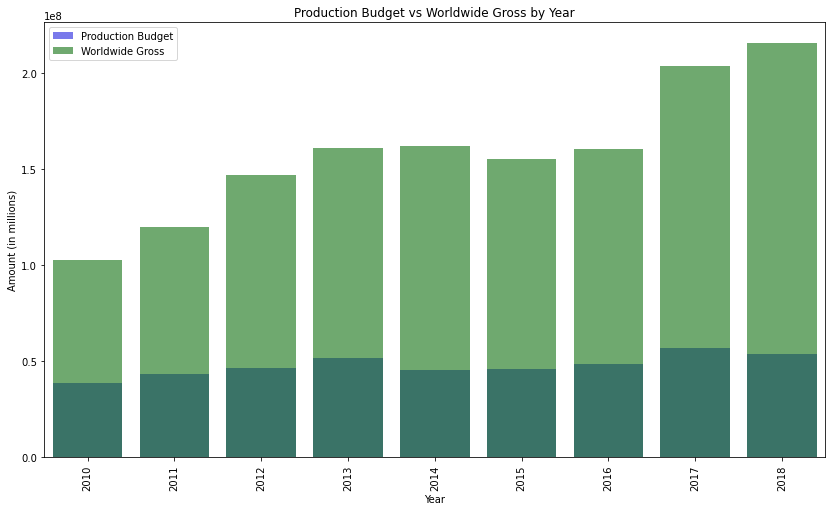

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average worldwide gross and production budget by year
finance_yearly = finance.groupby('year')[['worldwide_gross', 'production_budget']].mean().reset_index()

# Set up the figure
plt.figure(figsize=(14, 8))

# Plot the 'production_budget' and 'worldwide_gross' side by side for each 'year'
sns.barplot(x='year', y='production_budget', data=finance_yearly, color='blue', label='Production Budget', alpha=0.6)
sns.barplot(x='year', y='worldwide_gross', data=finance_yearly, color='green', label='Worldwide Gross', alpha=0.6)

# Title and axis labels
plt.title('Production Budget vs Worldwide Gross by Year')
plt.xlabel('Year')
plt.ylabel('Amount (in millions)')

# Adding a legend
plt.legend()

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


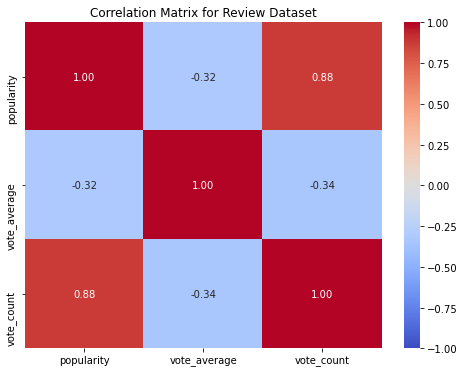

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the continuous columns you want to analyze (numeric columns)
review_data = review[['rating', 'popularity', 'vote_average', 'runtime', 'vote_count']]

# Calculate the correlation matrix
corr_matrix = review_data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Review Dataset')
plt.show()


In [117]:
review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   id                             24 non-null     int64   
 1   rating                         24 non-null     object  
 2   genre                          24 non-null     object  
 3   runtime                        24 non-null     object  
 4   theater_year                   24 non-null     float64 
 5   dvd_year                       24 non-null     float64 
 6   original_language              24 non-null     object  
 7   popularity                     24 non-null     float64 
 8   release_date                   24 non-null     int64   
 9   title                          24 non-null     object  
 10  vote_average                   24 non-null     float64 
 11  vote_count                     24 non-null     int64   
 12  popularity_group_percentiles   24 non-

## Modeling